## Variational Autoencoder
```
Variational autoencoder (VAE) is a generative model that learns the distribution of the data and generates new data points from the learned distribution.
```

In [1]:
# necessary imports
# add ../src to sys.path
import sys
sys.path.append('../src')

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm, trange

import VAE

In [2]:
# load MNIST data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# datasets
trainset = torchvision.datasets.MNIST(root='../../data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='../../data', train=False, download=True, transform=transform)


# data loaders
batch_size = 128
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

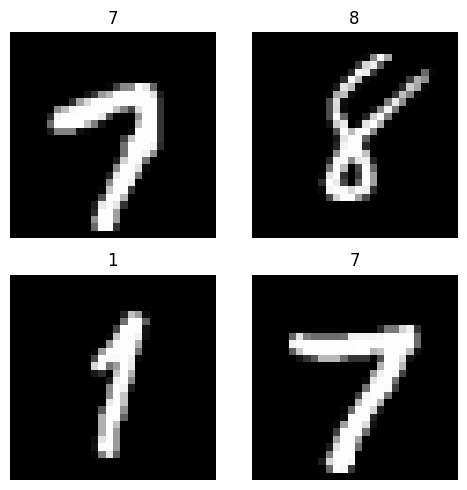

In [3]:
# visualize some data
def visualize_data(data, labels):
    fig, axs = plt.subplots(2,2, figsize=(5,5))
    axs = axs.flatten()
    for i in range(4):
        axs[i].imshow(data[i].squeeze(), cmap='gray')
        axs[i].set_title(labels[i].item())
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

# visualize some data
imgs, labels = next(iter(trainloader))
visualize_data(imgs, labels)

In [4]:
# device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [5]:
# image size
img_size = imgs[0].shape[1]**2 # 28*28 = 784

# hidden dimensions
hidden_dims = 400

# latent size
latent_size = 20


In [6]:
# define model
model = VAE.VAE(img_size, hidden_dims, latent_size).to(device)

# pass some data through the model
imgs, labels = next(iter(trainloader)) #imgs.shape = [batch_size, 1, 28, 28], labels.shape = [128]

# flatten images
imgs = imgs.view(imgs.shape[0], -1).to(device) #imgs.shape = [128, 784]
recon_imgs, mu, logvar = model(imgs) #recon_imgs.shape = [batch_size, img_size], mu.shape = [batch_size, latent_size], logvar.shape = [batch_size, latent_size]

print(recon_imgs.shape, mu.shape, logvar.shape)

torch.Size([128, 784]) torch.Size([128, 20]) torch.Size([128, 20])


In [7]:
# optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [14]:
# training loop
epochs = 100
for epoch in trange(epochs):
    for i, (imgs, labels) in enumerate(trainloader):
        # flatten imagessamples =
        imgs = imgs.view(imgs.shape[0], -1).to(device)

        # forward pass
        recon_imgs, mu, logvar = model(imgs)

        # loss
        loss = model.loss_function(recon_imgs, imgs, mu, logvar)

        # backward pass
        optimizer.zero_grad()
        loss.backward()

        # update weights
        optimizer.step()

    # print loss
    if epoch % 10 == 0:
        print('Epoch: {}, Loss: {:.4f}'.format(epoch, loss.item()))

  1%|          | 1/100 [00:06<10:16,  6.22s/it]

Epoch: 0, Loss: 7961.9277


 11%|█         | 11/100 [01:09<09:15,  6.25s/it]

Epoch: 10, Loss: 7716.6465


 21%|██        | 21/100 [02:10<08:05,  6.15s/it]

Epoch: 20, Loss: 7205.6743


 31%|███       | 31/100 [03:12<07:06,  6.18s/it]

Epoch: 30, Loss: 6916.2104


 41%|████      | 41/100 [04:14<06:03,  6.16s/it]

Epoch: 40, Loss: 7489.4263


 51%|█████     | 51/100 [05:16<05:07,  6.27s/it]

Epoch: 50, Loss: 7116.6904


 61%|██████    | 61/100 [06:19<04:04,  6.27s/it]

Epoch: 60, Loss: 6686.0366


 71%|███████   | 71/100 [07:21<03:00,  6.23s/it]

Epoch: 70, Loss: 6728.9429


 81%|████████  | 81/100 [08:23<01:56,  6.14s/it]

Epoch: 80, Loss: 6891.4990


 91%|█████████ | 91/100 [09:24<00:54,  6.05s/it]

Epoch: 90, Loss: 7010.1357


100%|██████████| 100/100 [10:18<00:00,  6.18s/it]


In [15]:
# generate some data
new_samples = model.sample(num_samples=64)
print('decoder_out.shape:', new_samples.shape)

decoder_out.shape: torch.Size([64, 784])


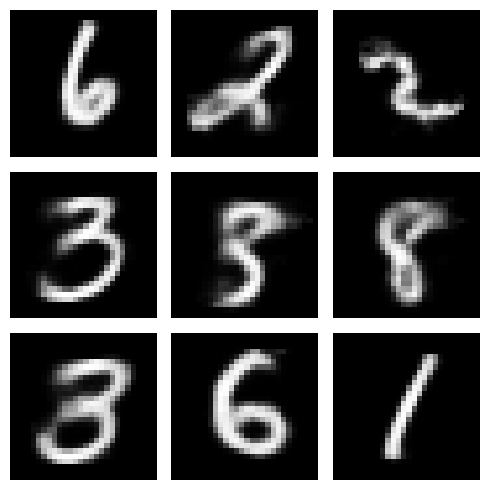

In [17]:
# visualize some generated data, 3x3 grid
fig, axs = plt.subplots(3,3, figsize=(5,5))
axs = axs.flatten()
for i in range(9):
    axs[i].imshow(new_samples[i].view(28,28).detach().cpu().numpy(), cmap='gray')
    axs[i].axis('off')
plt.tight_layout()
plt.show()

```
Seems to work well for MNIST dataset. Tuning the hyperparameters might result in better images.
```